In [27]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [368]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [429]:
# Generate shape
N = 5
positions = np.exp(1j*np.linspace(0, 2*np.pi-2*np.pi/N, N))
positions_xy = [[p.real, p.imag] for p in positions]

# Compute distance mat
D = distance_matrix(positions_xy, positions_xy)

# Build graph from distance matrix

G = nx.Graph()
G.add_nodes_from(range(N))    
G.add_edges_from([(i, j, {'weight': 1/D[i, j]}) for i in range(N) for j in range(i)] )

In [450]:
spring_pos = nx.spring_layout(G, threshold=1e-09, iterations=100)
pos_est = np.array([p[0]+1j*p[1] for p in spring_pos.values()])

Text(0.5, 1.0, 'Distance matrix')

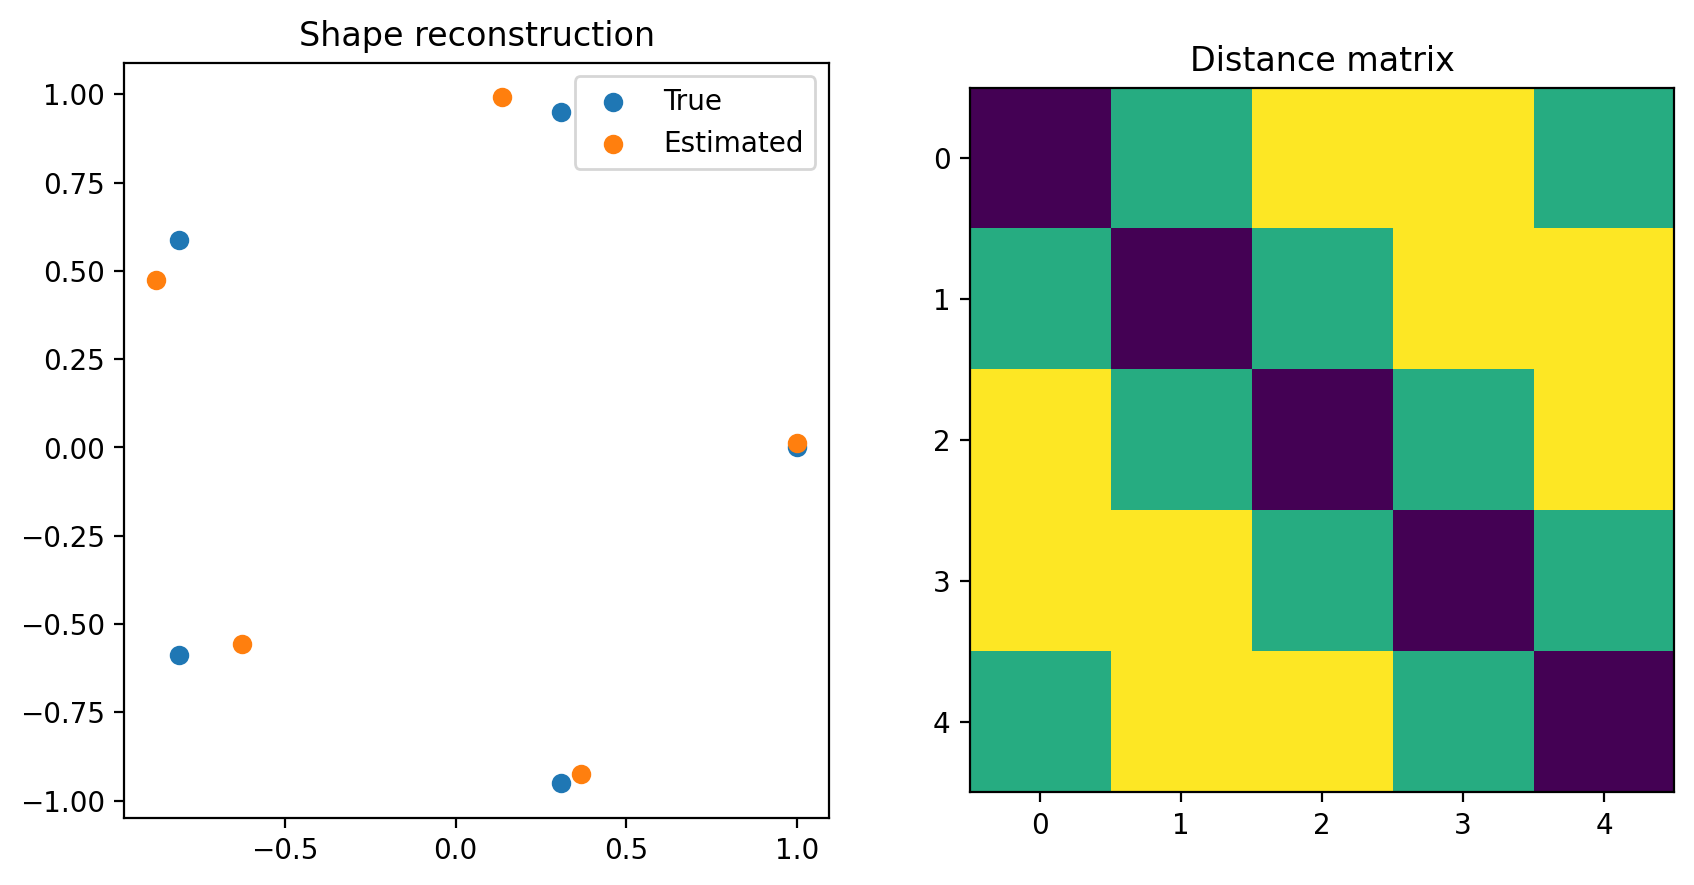

In [451]:
plt.figure(figsize=(10, 5), dpi = 100)
plt.subplot(1, 2, 1)
plt.scatter(positions.real, positions.imag, label = 'True')
plt.scatter(pos_est.real, pos_est.imag, label = 'Estimated'); plt.title('Shape reconstruction')
plt.legend()
plt.subplot(1, 2, 2)
plt.imshow(D); plt.title('Distance matrix')